# CaseMeta Lab

In [1]:
import pandas as pd

from bcd.container import BCDContainer
from bcd.data.analysis.case_meta import CaseMeta

container = BCDContainer()
container.init_resources()
container.wire(modules=['bcd.data.analysis.case_meta'])

In [2]:
repo = container.repo.meta()
calc = repo.get(filename='calc_cases.csv')

In [3]:
cases = calc.groupby(by='pathology')['patient_id'].nunique().to_frame().reset_index(names=['pathology', 'count'])
cases['type'] = 'case'
cases.columns = ['pathology', 'count', 'type']
abnorms = calc.groupby(by='pathology').size().to_frame().reset_index(names=['pathology', 'count'])
abnorms['type'] = 'abnormality'
abnorms.columns = ['pathology', 'count', 'type']
calc_cases = pd.concat([cases,abnorms], axis=0)
calc_cases


,pathology,count,type
0,BENIGN,420,case
1,MALIGNANT,343,case
0,BENIGN,1199,abnormality
1,MALIGNANT,673,abnormality


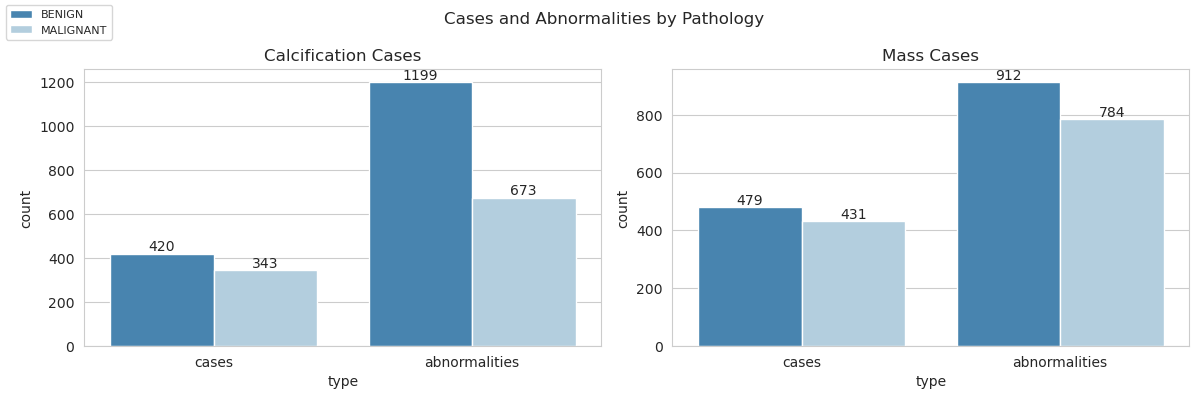

In [4]:
cm = CaseMeta()
cm.cases_and_abnormalities()

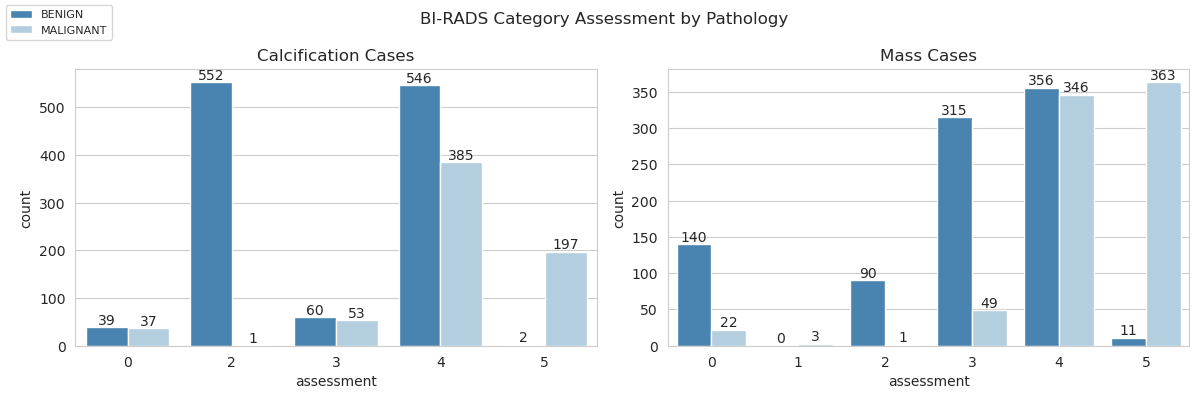

In [5]:
cm.abnormalities(title="BI-RADS Category Assessment by Pathology", measure='assessment', group='pathology', group_order=['BENIGN', 'MALIGNANT'])

In [ ]:
cm.abnormalities(title="Breast Density by Pathology", measure='breast_density', group='pathology', group_order=['BENIGN', 'MALIGNANT'])